<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

## Exploratory Data Analysis - Project

### Table of Contents
 1. [Problem Statement](#section1)</br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data set](#section102)<br/>
 2. [Load the packages and data](#section2)</br>
 3. [Data profiling](#section3)</br>
    - 3.1 [dtypes](#section301)<br/>
    - 3.2 [info](#section302)<br/>
    - 3.3 [head](#section303)<br/>
    - 3.4 [Describe](#section304)<br/>
    - 3.5 [Sample](#section305)<br/>
    - 3.6 [Pandas profiling](#section306)<br/>
    - 3.7 [Initial observations](#section307)<br/>
 4. [Identify patterns in the data](#section4)</br>
    - 4.1 [Product vs Fitness](#section401)<br/>
    - 4.2 [Classification by Product](#section402)<br/>
    - 4.3 [Customers Age distribution](#section403)<br/>
    - 4.4 [Usage Vs Fitness](#section404)<br/>
 5. [Analysis through questions](#section5)</br>
     - 5.1 [what are the key attributes of customer profile for TM798 ](#section501)<br/>
     - 5.2 [what are the key attributes of customer profile for TM195 ](#section502)<br/>
     - 5.3 [what are the key attributes of customer profile for TM498 ](#section503)<br/>
 6. [Conclusion](#section6)<br/>


<a id=section1></a>
## 1. Problem Statement

### CardioGoodFitness

The market research team at AdRight is assigned the task to *identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness*. 

Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

<a id=section101></a>

### 1.1 Introduction
The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a **CardioGoodFitness** retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file. 

The team identifies the following customer variables to study: Product, Gender, Age, Education, Relationship status, Income, Miles & Fitness.
  
  


<a id=section102></a>

### 1.2 Data set 

Took the data set from kaggle in csv format. Column definitions as as below :

Products purchased are TM195, TM498, or TM798;  

Gender;  

Age, in years;  

Education, in years;  

Relationship status, single or partnered;  

Annual household income ($);  

Average number of times the customer plans to use the treadmill each week;  

Average number of miles the customer expects to walk/run each week;  

And [rating] fitness on an 1-to-5 scale, where 1 is poor and 5 is excellent.  

<a id=section2></a>
## 2.Load Packages and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


In [2]:
cgf = pd.read_csv('/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv')


<a id=section3></a>
## 3. Data Profiling

Review the data types and sample data to understand what variables we are dealing with?

<a id=section301></a>
### 3.1 dTypes

In [3]:
cgf.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

<a id=section302></a>
### 3.2 Info

In [4]:
cgf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<a id=section303></a>
### 3.3 head

In [5]:
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


<a id=section304></a>
### 3.4 describe

In [6]:
cgf.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<a id=section305></a>
### 3.5 Sample

In [7]:
cgf.sample(8)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
10,TM195,22,Male,14,Single,3,3,36384,85
89,TM498,23,Female,16,Single,3,3,45480,95
155,TM798,25,Male,18,Partnered,6,5,75946,240
98,TM498,25,Female,14,Single,3,4,43206,127
27,TM195,25,Female,14,Partnered,3,3,48891,75
140,TM798,22,Male,14,Single,4,3,48658,106
50,TM195,29,Male,18,Partnered,3,3,68220,85
99,TM498,25,Male,16,Partnered,2,2,52302,42


<a id=section306></a>
### 3.6 Pandas profiling

In [8]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(cgf)
profile.to_file("cgf_preprofiling.html")

<a id=section307></a>
### 3.7 Initial Observations
  
*   There are no empty cells in the categorical & numerical columns.  
*   Though Max age shows is 50, 75% of customers are in 33 years age.
*   75% of customer gave rating of 3 and above.
*   There are outliers in Income and Miles thats why Max is very high.

<a id=section4></a>
## 4. Identify Patterns in the Data

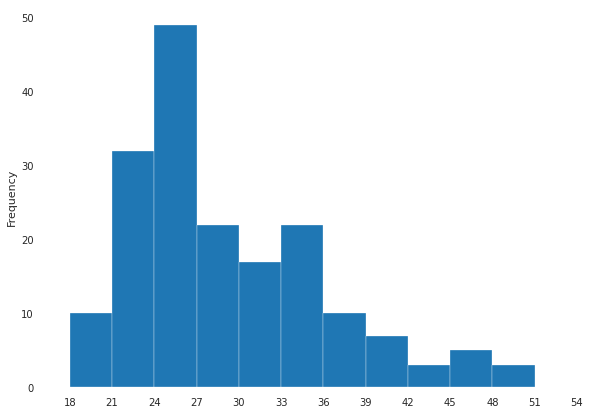

In [9]:
age_bins =  np.arange(18, 55, 3)
cgf['Age'].plot(kind='hist', bins=age_bins, figsize=(10,7), xticks=age_bins )

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


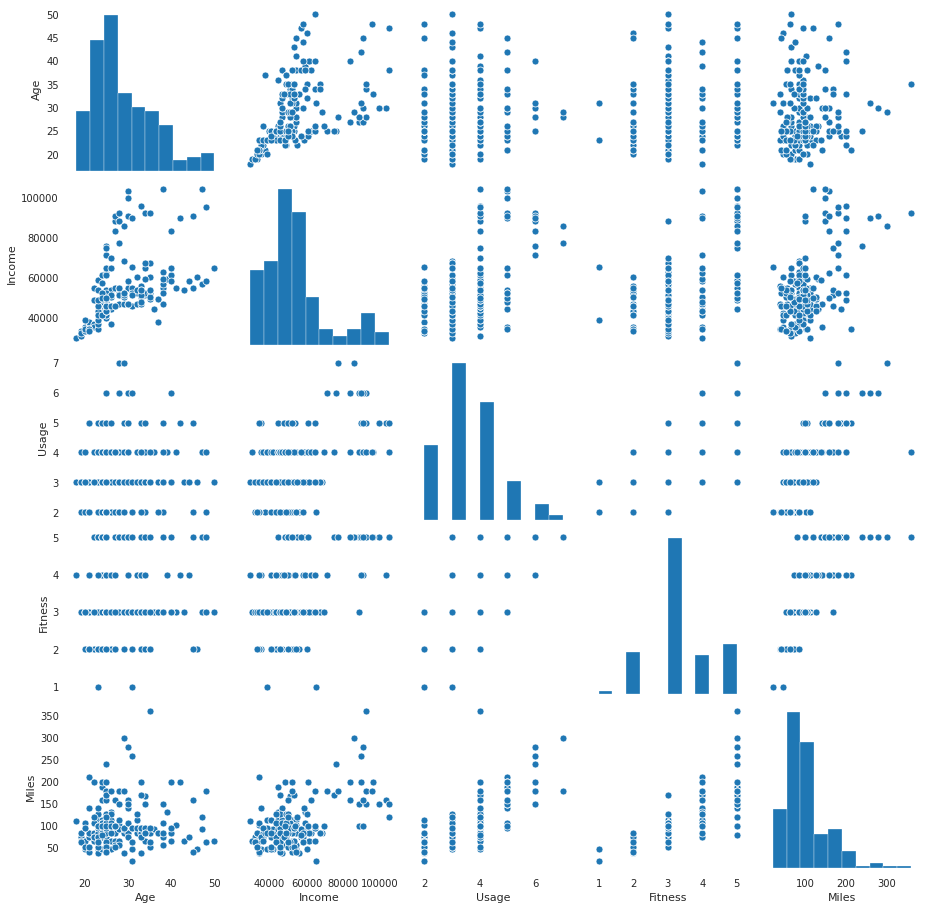

In [10]:
import seaborn as sns
sns.pairplot(data=cgf[['Age','Income','Usage','Fitness','Miles']], size=2.5)

##### Above histogram shows that Age column is right skewed. However, Majority of customers are between age of 21 and 36.

<a id=section401></a>
### 4.1 Product Vs Fitness

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64


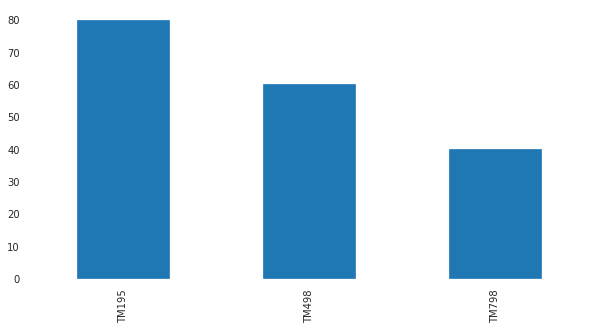

In [11]:
cgf['Product'].value_counts().plot(kind='bar', figsize=(10,5))
print(cgf['Product'].value_counts())

##### From the above Bar chart, its clear that TM195 were sold more & TM798 were sold less.

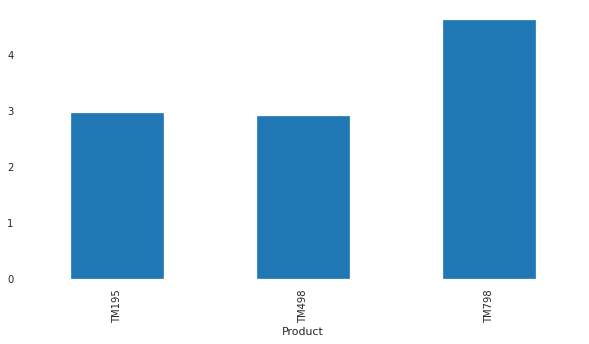

In [12]:
cgf.groupby(['Product'])['Fitness'].mean().plot(kind='bar', figsize=(10,5))

In [13]:
cgf[cgf['Fitness']>3]['Product'].value_counts()

TM798    36
TM195    11
TM498     8
Name: Product, dtype: int64

##### Though TM798 were sold less, above bar chart shows that Mean fitness ratings are high for it. This shows that though its users are less this product bagged higher ratings & mean jumped up. Also there are more of type TM798 when ratings are filtered as [>3]

<a id=section402></a>
### 4.2 Classification by Product

In [14]:
cgf_798 = cgf[cgf['Product'] == 'TM798']
cgf_195 = cgf[cgf['Product'] == 'TM195']
cgf_498 = cgf[cgf['Product'] == 'TM498']


In [15]:
cgf_195.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [16]:
cgf_798.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


In [17]:
cgf_498.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


<a id=section403></a>
### 4.3 Customers Age distribution

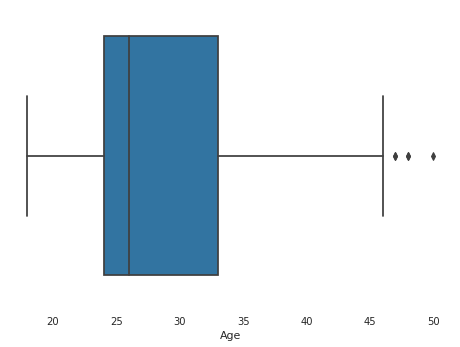

In [18]:
sns.boxplot(data=cgf, x='Age')

In [19]:
count_lessthanage40 = cgf[cgf['Age']<40]['Product'].value_counts().sum()
print(count_lessthanage40 / len(cgf) * 100)

90.55555555555556


#### Above boxplot shows that 75% of customers are of age<35. Above calculation shows that 90% of customers purchased are less than age 40.

<a id=section404></a>
### 4.4 Usage Vs Fitness

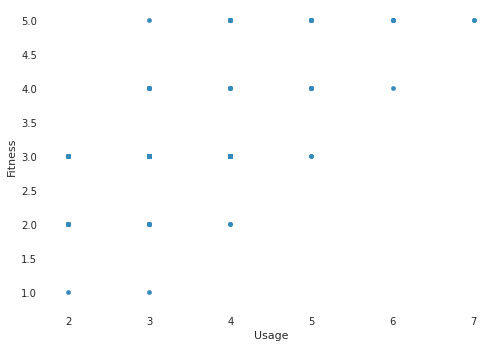

In [20]:
cgf.plot(kind='scatter', x="Usage", y='Fitness')

#### Higher the usage, higher the fitness [Ratings]

<a id=section5></a>
## 5. Analysis through Questions

<a id=section501></a>
### 5.1 what are the key attributes of customer profile for TM798

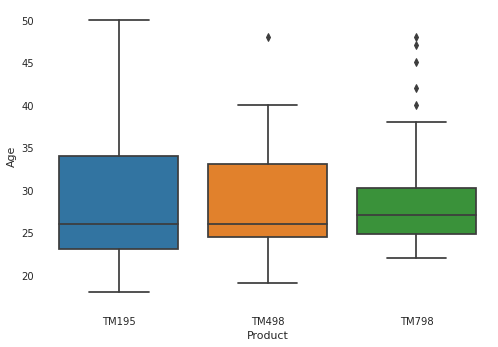

In [21]:
cgf_fitness = cgf[cgf['Fitness']>2]
sns.boxplot(data=cgf_fitness, x='Product', y='Age' )

##### Above boxplot shows the age boxing of the customers who gave rating >2. I selected this group to observe patterns of such potential similarities. For TM798 its clear that 75% of customers are boxed in age between 22 & 30.  
  
  

In [22]:
print(len(cgf_798[cgf_798['Miles']>=100]) / len(cgf_798['Miles']))
print(len(cgf_798[cgf_798['Usage']>3]) / len(cgf_798['Miles']))
Miles_maxIndex = cgf[['Miles']].idxmax()
print('Miles max Index is ', Miles_maxIndex)
print(cgf.iloc[Miles_maxIndex])

Usage_maxIndex = cgf[['Usage']].idxmax()
print('Usage Max Index is ', Usage_maxIndex)
print(cgf.iloc[Usage_maxIndex])

0.975
0.975
Miles max Index is  Miles    173
dtype: int64
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
173   TM798   35   Male         16     Partnered      4        5   92131   

     Miles  
173    360  
Usage Max Index is  Usage    163
dtype: int64
    Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
163   TM798   28   Male         18     Partnered      7        5   77191   

     Miles  
163    180  


##### 97.5% of customers using TM798 model covered min of 100 miles.
  ##### 97.5% of customer using TM798 model have a minimum usage of 3 times a week.
  ##### Customers with Max Usage and Max number of Miles are using TM798 model only.

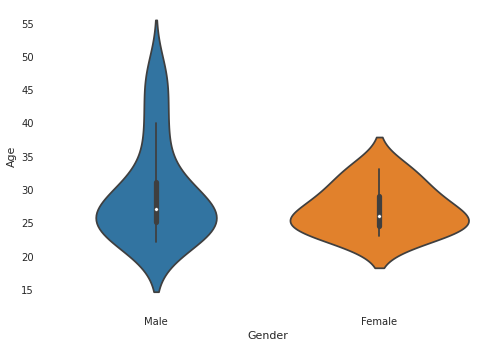

In [23]:
sns.violinplot(data=cgf_798, x='Gender', y='Age')

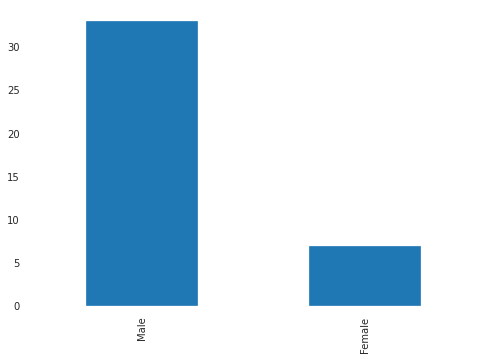

In [24]:
cgf_798['Gender'].value_counts().plot(kind='bar')

#### Above violin and Bar plots shows Men are more in the customer mix of TM798.

<a id=section502></a>
### 5.2 what are the key attributes of customer profile for TM195

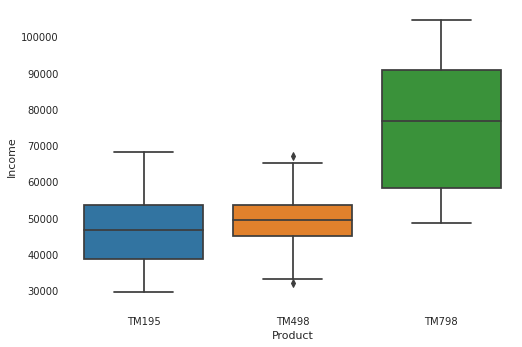

In [25]:
sns.boxplot(data=cgf, x='Product', y="Income")

#### 75% of customers using are <54K. Based on the income ranges, This sounds like TM195 model is more economical.

Text(0.5, 0, 'Usage')

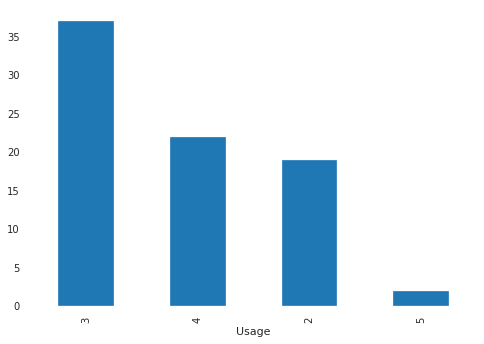

In [26]:
cgf_195['Usage'].value_counts().plot(kind='bar')
plt.xlabel('Usage')

#### This bar diagram shows that if any customer with weekly usage of 3 or 4 would like to go for TM195.

Text(0.5, 0, 'Fitness')

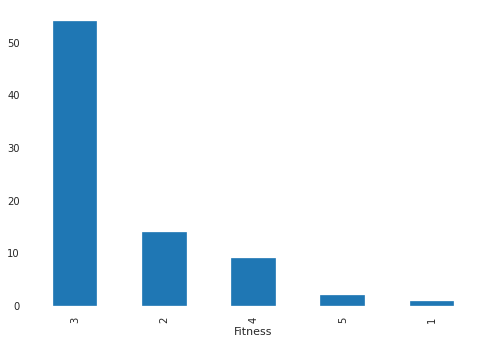

In [27]:
cgf_195['Fitness'].value_counts().plot(kind='bar')
plt.xlabel('Fitness')

<a id=section503></a>
### 5.3 what are the key attributes of customer profile for TM498

Text(0.5, 0, 'Fitness')

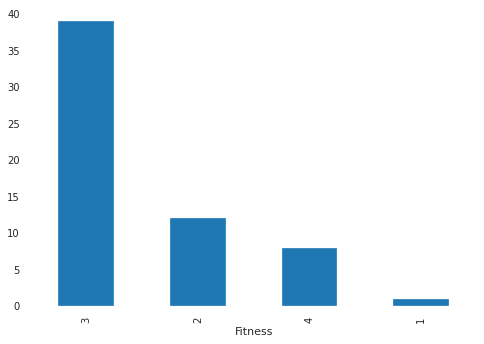

In [28]:
cgf_498['Fitness'].value_counts().plot(kind='bar')
plt.xlabel('Fitness')

#### None of the customer gave fitness rating 5, Majority of the ratings are 3 and below.

Text(0.5, 0, 'Usage')

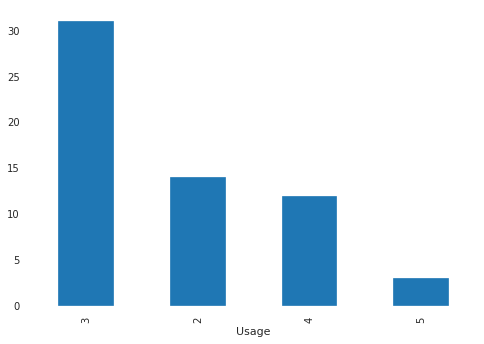

In [29]:
cgf_498['Usage'].value_counts().plot(kind='bar')
plt.xlabel('Usage')

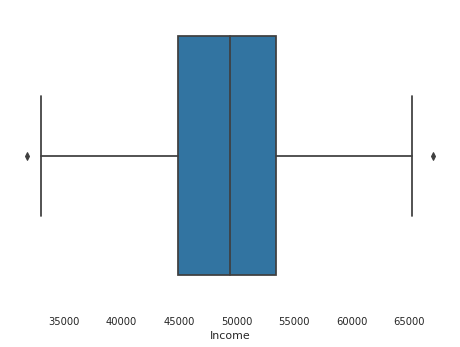

In [30]:
sns.boxplot(data=cgf_498, x="Income")

#### 75% of customers using are <54K. Based on the income ranges, This sounds like TM498 model is also economical.

<a id=section6></a>
## 6. Conclusion

For TM798, Typical customer profile would be between **age of 22 and 30** and **Male**. Everyone have **usage of 4 times or above** per week. This looks costlier so its appropriate for **higher income range[mean >74K]**. [From section 5.1]
  
For TM195, Typical customer profile would be of **Income range between 29K and 54k**. **Education between 12 and 16 years**. 75% of customers are under Usage >3. 80% of fitness [rating] is <3. This is economical so there is more sales compared to TM798 product. [From section 5.2]

For TM498, Typical customer profile would be of **Income range [<54k]**. There is **no 5 star rating** for this product however this supported till 212 miles.80% of customers are under Usage <3. 80% of fitness [rating] is <3. This is **economical** so there is more sales compared to TM798 product. [From section 5.3]

#### Actionable Insights :

TM798 bagged higher ratings but sales is low, This sounds costly so if this can be price sensitive then this product sales can boost up.
  
TM195 were sold more, however there is more of rating 3. Based on income ranges, this is already at economical range.  This type possibly have opportunity to improve user experience of the product.
  
TM498 falls in economical range. This type possibly have opportunity to improve product features.
